In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the TED Talks dataset into a pandas DataFrame
df = pd.read_csv('data/ted_main.csv')

In [3]:
# Extract the 'duration' column from the DataFrame
talk_durations = df['duration']

In [4]:
def hypercube_kernel(x, xi, h):
    # Calculate the hypercube kernel to map data points with respect to a center and window size (h)
    return (x - xi) / h

In [5]:
def gaussian_kernel(x):
    # Calculate the Gaussian kernel for the given data point vector
    return (1 / math.sqrt(2 * math.pi)) * (math.e ** (-(x**2) / 2))

In [6]:
def parzen_estimate(x_samples, data_point, h):
    # Estimate the probability density function using the Parzen Window method
    kn = 0
    xi_transformed = [hypercube_kernel(data_point, x, h) for x in x_samples]

    for k in xi_transformed:
        kn += gaussian_kernel(k)

    return (kn / len(x_samples)) / h

In [7]:
def plot_density(kernel_estimate):
    # Plot the density using seaborn
    fig = plt.figure(figsize=(10, 7), dpi=80)
    sns.kdeplot(kernel_estimate, color="orange", label="Parzen Window Estimate")
    plt.xlim(0, 0.005)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Density')
    plt.show()

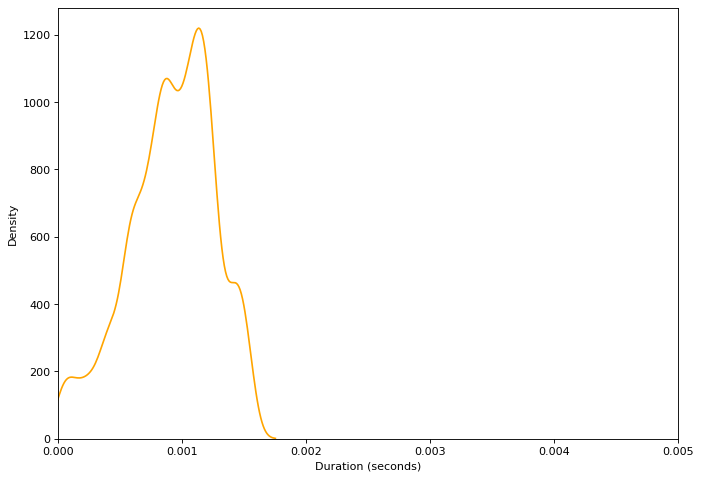

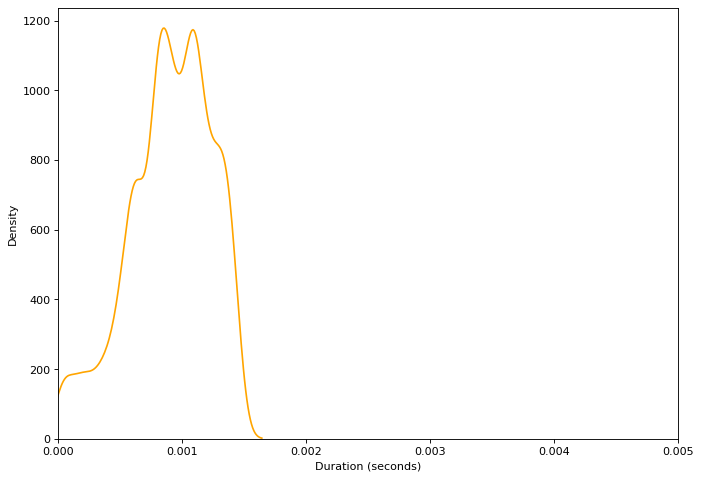

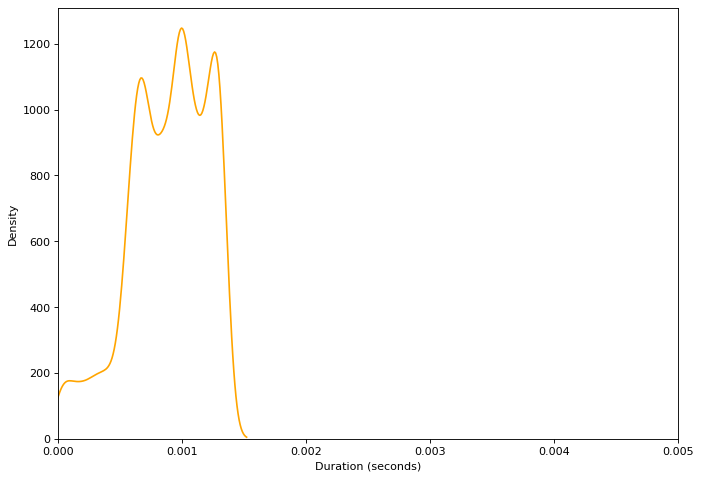

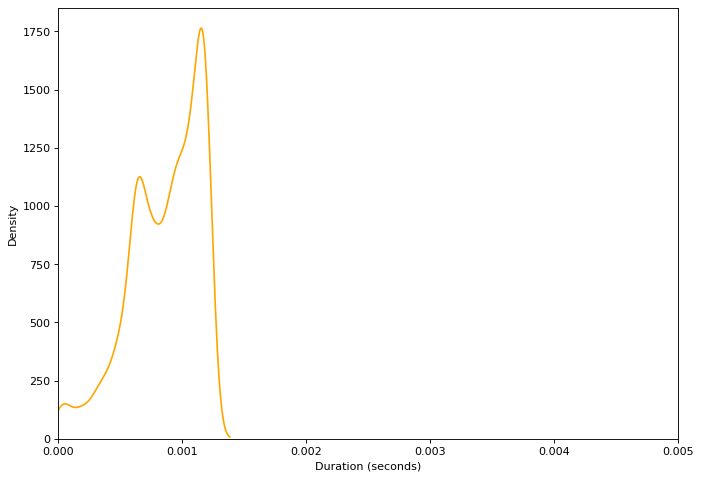

In [8]:
# Estimate density using the Parzen Window method with different window sizes (h values)
h_values = [10, 20, 50, 100]
density_estimates = {}

for h in h_values:
    kernel_estimate = [parzen_estimate(talk_durations, duration, h) for duration in talk_durations]
    density_estimates[h] = kernel_estimate
    plot_density(kernel_estimate)